In [ ]:
from google.colab import files
uploaded = files.upload()


Saving blood.csv to blood.csv


In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv('blood.csv')

# Check basic structure
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Recency    748 non-null    int64
 1   Frequency  748 non-null    int64
 2   Monetary   748 non-null    int64
 3   Time       748 non-null    int64
 4   Class      748 non-null    int64
dtypes: int64(5)
memory usage: 29.3 KB


,Recency,Frequency,Monetary,Time,Class
0,2,50,12500,99,1
1,0,13,3250,28,1
2,1,17,4000,36,1
3,2,20,5000,45,1
4,1,24,6000,77,0


In [ ]:
# Summary statistics
df.describe()

# Check for missing values
df.isnull().sum()


,0
Recency,0
Frequency,0
Monetary,0
Time,0
Class,0


In [ ]:
print(df.columns.tolist())


['Recency', 'Frequency', 'Monetary', 'Time', 'Class']


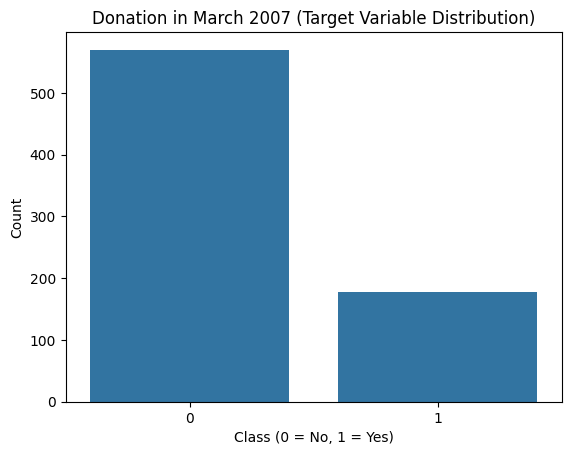

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Class', data=df)
plt.title("Donation in March 2007 (Target Variable Distribution)")
plt.xlabel("Class (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()


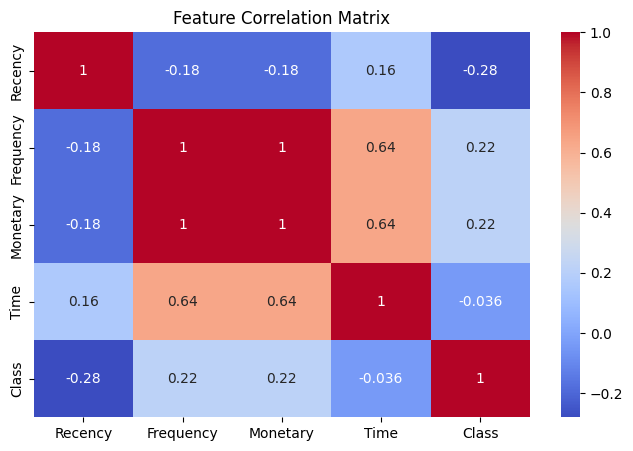

In [ ]:
plt.figure(figsize=(8, 5))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Matrix")
plt.show()


In [ ]:
X = df.drop('Class', axis=1)
y = df['Class']
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Accuracy: 0.7666666666666667
Precision: 0.5714285714285714
Recall: 0.1111111111111111
F1 Score: 0.18604651162790697


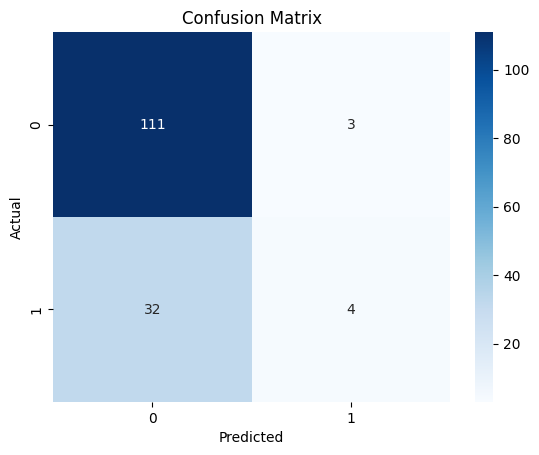


Classification Report:

              precision    recall  f1-score   support

           0       0.78      0.97      0.86       114
           1       0.57      0.11      0.19        36

    accuracy                           0.77       150
   macro avg       0.67      0.54      0.52       150
weighted avg       0.73      0.77      0.70       150



In [ ]:
from sklearn.linear_model import LogisticRegression

# Initialize and train the model
log_model = LogisticRegression()
log_model.fit(X_train_scaled, y_train)
y_pred = log_model.predict(X_test_scaled)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Accuracy and core metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

# Confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Full classification report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))


In [ ]:
# Predict probabilities (for confidence scores)
y_probs = log_model.predict_proba(X_test_scaled)[:, 1]

# Create a result DataFrame
results = X_test.copy()
results['Actual'] = y_test.values
results['Predicted'] = y_pred
results['Confidence'] = y_probs

# Preview top 5
results.head()
def generate_recommendation(row):
    if row['Predicted'] == 1:
        return "Send reminder for next donation"
    else:
        return "Recommend blood awareness & wellness content"

results['Recommendation'] = results.apply(generate_recommendation, axis=1)
results.head()


,Recency,Frequency,Monetary,Time,Actual,Predicted,Confidence,Recommendation
514,4,16,4000,38,1,1,0.596373,Send reminder for next donation
417,16,1,250,16,0,0,0.104767,Recommend blood awareness & wellness content
497,38,1,250,38,0,0,0.010107,Recommend blood awareness & wellness content
91,4,2,500,4,0,0,0.335601,Recommend blood awareness & wellness content
312,12,9,2250,60,0,0,0.149379,Recommend blood awareness & wellness content


from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Recency'].plot(kind='hist', bins=20, title='Recency')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Frequency'].plot(kind='hist', bins=20, title='Frequency')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['Monetary'].plot(kind='hist', bins=20, title='Monetary')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('Recommendation').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='index', y='Recency', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='Recency', y='Frequency', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='Frequency', y='Monetary', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8.plot(kind='scatter', x='Monetary', y='Time', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Time']
  ys = series['index']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('Time', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Recommendation')):
  _plot_series(series, series_name, i)
  fig.legend(title='Recommendation', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Time')
_ = plt.ylabel('index')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Time']
  ys = series['Recency']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('Time', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Recommendation')):
  _plot_series(series, series_name, i)
  fig.legend(title='Recommendation', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Time')
_ = plt.ylabel('Recency')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Time']
  ys = series['Frequency']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('Time', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Recommendation')):
  _plot_series(series, series_name, i)
  fig.legend(title='Recommendation', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Time')
_ = plt.ylabel('Frequency')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Time']
  ys = series['Monetary']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_12.sort_values('Time', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Recommendation')):
  _plot_series(series, series_name, i)
  fig.legend(title='Recommendation', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Time')
_ = plt.ylabel('Monetary')

from matplotlib import pyplot as plt
_df_13['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['Recency'].plot(kind='line', figsize=(8, 4), title='Recency')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_15['Frequency'].plot(kind='line', figsize=(8, 4), title='Frequency')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_16['Monetary'].plot(kind='line', figsize=(8, 4), title='Monetary')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_17['Recommendation'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_17, x='index', y='Recommendation', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_18['Recommendation'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_18, x='Recency', y='Recommendation', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_19['Recommendation'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_19, x='Frequency', y='Recommendation', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_20['Recommendation'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_20, x='Monetary', y='Recommendation', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)